# Pulling Stream Data with the Rune Labs API/SDK

This tutorial demonstrates the basic steps of pulling streams of data using the Rune Labs API/SDK. This is done using stream metadata (or stream IDs), which is explained in the previous tutorial.

This tutorial follows: [Querying Stream Metadata with the Rune Labs API/SDK](04_querying_stream_metadata.ipynb).

For detailed information:
* [Rune Labs API documentation](https://docs.runelabs.io)
* [Rune Labs SDK documentation](https://runeq.readthedocs.io/en/latest/)
* [Rune Labs open source code respository](https://github.com/rune-labs/runeq-python/tree/main/examples) (which includes this notebook)

---

## Set Up

Initialize the Rune SDK with your platform credentials, as described previously: [Getting Started with the Rune Labs API/SDK](01_getting_started_with_Rune_SDK.ipynb)

In [1]:
# Initialize the SDK.
from runeq import initialize

initialize()

To confirm that you have successfully initialized the SDK in your current script or notebook, pull your own information using the `get_current_user()` function.

In [2]:
# Get the ID and name of the current user, based on API credentials.
from runeq.resources.user import get_current_user

my_user = get_current_user()
print(my_user)

User(id="user-b9c372f2b315a6c6cfd9b5ef7eba81e5ef7866d1,user", name="Gavin Philips")


In [3]:
# Confirm user's current active org.
print('Active Org:', my_user.active_org_name)

Active Org: Rune Demo


---

## Patients

[Exploring Organizations and Patients with the Rune Labs API/SDK](02_exploring_organizations_and_patients.ipynb) includes instructions to copy a `patient_id` from a patient in your org. Paste that `patient_id` into the cell below.

We could also explore stream metadata across all patients in the org, but for simplicity, we'll focus on one in this tutorial.

In [4]:
# Set ID of example patient from your org.
patient_id = 'e3dd146f74714135a11128e99f1557f0'

---

## Stream Metadata

Finding and accessing data using our API/SDK is a two-step process:
1. Query for data streams using a desired set of parameters
    * Result: A set of stream metadata, which describes a set of streams
2. Use the resulting stream IDs to pull the desired data for a chosen time frame
    * Result: Actual data in a chosen format

We covered the first step in the previous tutorial, and will continue to the second step here, using the same example.

Use the [get_patient_stream_metadata()](https://runeq.readthedocs.io/en/latest/pages/resources.html#runeq.resources.stream_metadata.get_patient_stream_metadata) function to query for the metadata of the desired stream(s):

In [6]:
# Query for the specific desired stream(s).
from runeq.resources.stream_metadata import get_patient_stream_metadata
import pandas as pd

tremor_metadata = get_patient_stream_metadata(
    patient_id=patient_id,
    algorithm='ingest-strive-applewatch-md.0', 
    measurement='tremor', 
    severity='all', 
    stream_type_id='duration'
)
tremor_metadata_df = tremor_metadata.to_dataframe()

tremor_metadata_df

,created_at,algorithm,device_id,patient_id,stream_type,min_time,max_time,parameters,category,severity,measurement,id
0,1.668829e+09,ingest-strive-applewatch-md.0,LARICRKw,e3dd146f74714135a11128e99f1557f0,"{'name': 'Duration', 'description': 'Durations...",1.668225e+09,1.693247e+09,"{'category': 'symptom', 'severity': 'all', 'me...",symptom,all,tremor,83257a46c877b96f4c639d2d3961401baf27d50b69f777...


We've narrowed down our query to retrieve the metadata of exactly one stream. Now we can use this metadata to pull the actual stream data.

---

## Stream Data

A `StreamMetadataSet` object has a handy method called [get_stream_dataframe()](https://runeq.readthedocs.io/en/latest/pages/resources.html#runeq.resources.stream_metadata.StreamMetadataSet.get_stream_dataframe), which pulls the data for all streams in the set and returns a [Pandas DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). Pandas DataFrames are commonly used for data analysis in Python, fit directly into many users' existing workflows, and can be easily saved to multiple file formats.

For convenience, this DataFrame combines the stream data with metadata, so that each sample (row) is labeled with relevant parameters, such as device ID, category, and stream type. This eases merging and manipulation of data, as well as differentiation of data from multiple streams.

In [7]:
# Pull the actual data for the stream(s) in the stream metadata set.
tremor = tremor_metadata.get_stream_dataframe()

# Display just the first ten rows.
tremor.head(10)

,time,duration,measurement_duration_ns,stream_id,stream_type_id,patient_id,device_id,algorithm,category,severity,measurement
0,2022-11-12T03:53:00Z,0.000000,60000000000,83257a46c877b96f4c639d2d3961401baf27d50b69f777...,duration,e3dd146f74714135a11128e99f1557f0,LARICRKw,ingest-strive-applewatch-md.0,symptom,all,tremor
1,2022-11-12T03:54:00Z,0.000000,60000000000,83257a46c877b96f4c639d2d3961401baf27d50b69f777...,duration,e3dd146f74714135a11128e99f1557f0,LARICRKw,ingest-strive-applewatch-md.0,symptom,all,tremor
2,2022-11-12T03:55:00Z,0.000000,60000000000,83257a46c877b96f4c639d2d3961401baf27d50b69f777...,duration,e3dd146f74714135a11128e99f1557f0,LARICRKw,ingest-strive-applewatch-md.0,symptom,all,tremor
3,2022-11-12T03:56:00Z,0.000000,60000000000,83257a46c877b96f4c639d2d3961401baf27d50b69f777...,duration,e3dd146f74714135a11128e99f1557f0,LARICRKw,ingest-strive-applewatch-md.0,symptom,all,tremor
4,2022-11-12T03:57:00Z,0.000000,60000000000,83257a46c877b96f4c639d2d3961401baf27d50b69f777...,duration,e3dd146f74714135a11128e99f1557f0,LARICRKw,ingest-strive-applewatch-md.0,symptom,all,tremor
5,2022-11-12T03:58:00Z,0.000000,60000000000,83257a46c877b96f4c639d2d3961401baf27d50b69f777...,duration,e3dd146f74714135a11128e99f1557f0,LARICRKw,ingest-strive-applewatch-md.0,symptom,all,tremor
6,2022-11-12T03:59:00Z,0.000000,60000000000,83257a46c877b96f4c639d2d3961401baf27d50b69f777...,duration,e3dd146f74714135a11128e99f1557f0,LARICRKw,ingest-strive-applewatch-md.0,symptom,all,tremor
7,2022-11-12T04:00:00Z,0.000000,60000000000,83257a46c877b96f4c639d2d3961401baf27d50b69f777...,duration,e3dd146f74714135a11128e99f1557f0,LARICRKw,ingest-strive-applewatch-md.0,symptom,all,tremor
8,2022-11-12T04:01:00Z,10.434783,60000000000,83257a46c877b96f4c639d2d3961401baf27d50b69f777...,duration,e3dd146f74714135a11128e99f1557f0,LARICRKw,ingest-strive-applewatch-md.0,symptom,all,tremor
9,2022-11-12T04:02:00Z,5.000000,60000000000,83257a46c877b96f4c639d2d3961401baf27d50b69f777...,duration,e3dd146f74714135a11128e99f1557f0,LARICRKw,ingest-strive-applewatch-md.0,symptom,all,tremor


Depending on the sampling rate of the desired stream(s), a pull like this could return large amounts of data. Often, it is ideal to pull data only for a selected window of time. This can be accomplished using the `start_time` and `end_time` parameters of the `get_stream_dataframe()` function.

For example, specify April, 2023:

In [8]:
# Set start and end times as unix timestamps.
start_time = 1680307200 # 2023-04-01 (midnight UTC)
end_time = 1682899200 # 2023-05-01 (midnight UTC)

# Pull the actual data for the stream(s) in the stream metadata set.
tremor = tremor_metadata.get_stream_dataframe(
    start_time=start_time,
    end_time=end_time,
)

# Display just the first ten rows.
tremor.head(10)

,time,duration,measurement_duration_ns,stream_id,stream_type_id,patient_id,device_id,algorithm,category,severity,measurement
0,2023-04-01T06:00:00Z,0.0,60000000000,83257a46c877b96f4c639d2d3961401baf27d50b69f777...,duration,e3dd146f74714135a11128e99f1557f0,LARICRKw,ingest-strive-applewatch-md.0,symptom,all,tremor
1,2023-04-01T06:01:00Z,0.0,60000000000,83257a46c877b96f4c639d2d3961401baf27d50b69f777...,duration,e3dd146f74714135a11128e99f1557f0,LARICRKw,ingest-strive-applewatch-md.0,symptom,all,tremor
2,2023-04-01T06:02:00Z,0.0,60000000000,83257a46c877b96f4c639d2d3961401baf27d50b69f777...,duration,e3dd146f74714135a11128e99f1557f0,LARICRKw,ingest-strive-applewatch-md.0,symptom,all,tremor
3,2023-04-01T06:03:00Z,0.0,60000000000,83257a46c877b96f4c639d2d3961401baf27d50b69f777...,duration,e3dd146f74714135a11128e99f1557f0,LARICRKw,ingest-strive-applewatch-md.0,symptom,all,tremor
4,2023-04-01T06:04:00Z,0.0,60000000000,83257a46c877b96f4c639d2d3961401baf27d50b69f777...,duration,e3dd146f74714135a11128e99f1557f0,LARICRKw,ingest-strive-applewatch-md.0,symptom,all,tremor
5,2023-04-01T06:05:00Z,0.0,60000000000,83257a46c877b96f4c639d2d3961401baf27d50b69f777...,duration,e3dd146f74714135a11128e99f1557f0,LARICRKw,ingest-strive-applewatch-md.0,symptom,all,tremor
6,2023-04-01T06:06:00Z,0.0,60000000000,83257a46c877b96f4c639d2d3961401baf27d50b69f777...,duration,e3dd146f74714135a11128e99f1557f0,LARICRKw,ingest-strive-applewatch-md.0,symptom,all,tremor
7,2023-04-01T06:07:00Z,0.0,60000000000,83257a46c877b96f4c639d2d3961401baf27d50b69f777...,duration,e3dd146f74714135a11128e99f1557f0,LARICRKw,ingest-strive-applewatch-md.0,symptom,all,tremor
8,2023-04-01T06:08:00Z,0.0,60000000000,83257a46c877b96f4c639d2d3961401baf27d50b69f777...,duration,e3dd146f74714135a11128e99f1557f0,LARICRKw,ingest-strive-applewatch-md.0,symptom,all,tremor
9,2023-04-01T06:09:00Z,0.0,60000000000,83257a46c877b96f4c639d2d3961401baf27d50b69f777...,duration,e3dd146f74714135a11128e99f1557f0,LARICRKw,ingest-strive-applewatch-md.0,symptom,all,tremor


**A few observations from this data:**
* As noted, the `get_stream_dataframe()` function has included several columns of metadata, labeling each sample (row) for convenience.
* The actual data values are found in the column named `duration`, due to the stream type.
    * (Stream types are discussed in [Stream Types](06_stream_types.ipynb))
* The `measurement_duration_ns` column gives the amount of time over which each sample was gathered.
    * The unit is nanoseconds. Divide by 1,000,000,000 to convert to seconds.
    * For tremor and dyskinesia data, each sample is calculated from 60 seconds of raw sensor data.
    * So a `duration` value of `5` indicates that five seconds of tremor were observed during that particular 60 second window of time.
* Samples only exist for times when data is available.
    * The last sample here is from April 29 at 18:21, because the patient removed the watch at that time, and did not gather any more data during April.
    * If there were no data available in the queried time window, the dataframe would be empty.
    * Sampling rate depends on the source device, and may not be constant, particularly where there are gaps in data.

---

## Moving Forward

At this point, the basic steps for querying and pulling using the Rune Labs API/SDK have been completed. The desired data is ready for manipulation, processing, visualization, and storage.

For example, a quick plot to get an idea of its structure:

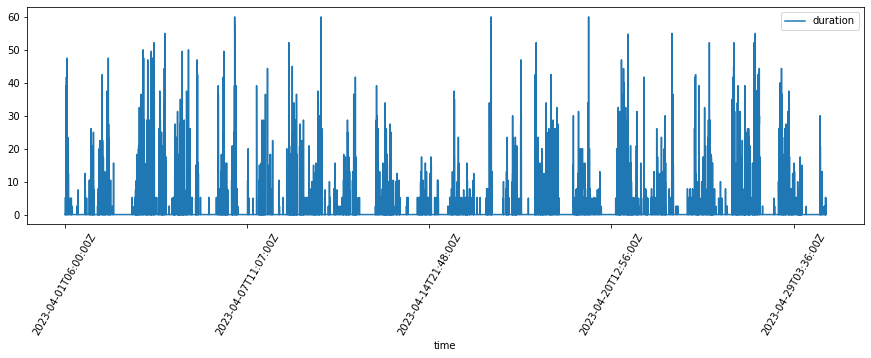

In [9]:
# Plot tremor duration over time.
tremor.plot(x='time', y='duration', rot=60, figsize=(15,4));

Additional tutorials are available to explain [stream types](06_stream_types.ipynb) and [data availability](07_checking_data_availability.ipynb).

Examples of common workflows and usage are listed in the [README](README.md).